<img align="left" width="300" height="2000" src="iris.png">
&nbsp;                                                                                                                            
&nbsp;

# <center> <h1>Perceptron Using IRIS Data Set</h1> </center> 
#### <center> <h1>in JULIA</h1> </center>
&nbsp;                                                                                                                            
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;                                                                                                                            
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp; 


In [1]:
using CSV, Plots, Random

In [ ]:
iris = CSV.read("iris_data.csv")

Range all rows into a Data Frame of 5 columns

In [18]:
iris = iris[:,1:5];                  

In [19]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,String⍰
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In this model we are only allowed to use two of the measurements to make our model: SepalLength	SepalWidth	PetalLength	PetalWidth. The possible combinations are:
1. col(1) and col(2)
2. col(1) and col(3)
3. col(1) and col(4)
4. col(2) and col(3)
5. col(2) and col(4)
6. col(3) and col(4)


In [57]:
SepalLength_SepalWidth       = [x for x in zip(iris[1], iris[2], iris[5])]
SepalLength_PetalLength      = [x for x in zip(iris[1], iris[3], iris[5])]
SepalLength_PetalWidth       = [x for x in zip(iris[1], iris[4], iris[5])]
SepalWidth_PetalLength       = [x for x in zip(iris[2], iris[3], iris[5])]
SepalWidth_PetalWidth        = [x for x in zip(iris[2], iris[4], iris[5])]
PetalLength_PetalWidth       = [x for x in zip(iris[3], iris[4], iris[5])];

Plotting the combination of IRIS Data Set. Notice the Second Plot Lenght and Width interchange.

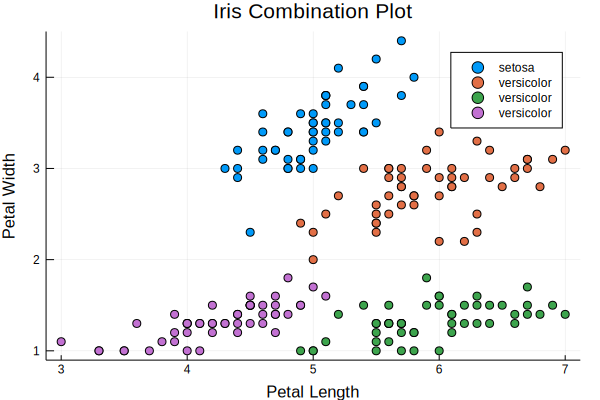

In [90]:
scatter([x[1:2] for x in SepalLength_SepalWidth if x[3] == "setosa"], label = "setosa")
scatter!([x[1:2] for x in SepalLength_SepalWidth if x[3] != "setosa"], label = "versicolor")
scatter!([x[1:2] for x in SepalLength_PetalWidth if x[3] != "setosa"], label = "versicolor")
scatter!([x[1:2] for x in PetalLength_PetalWidth if x[3] != "setosa"], label = "versicolor")
plot!(title = "Iris Combination Plot", xlabel = "Petal Length", ylabel = "Petal Width")

In [ ]:
scatter!([x[1:2] for x in SepalWidth_PetalLength if x[3] != "setosa"], label = "versicolor")
scatter!([x[1:2] for x in SepalWidth_PetalWidth if x[3] != "setosa"], label = "versicolor")

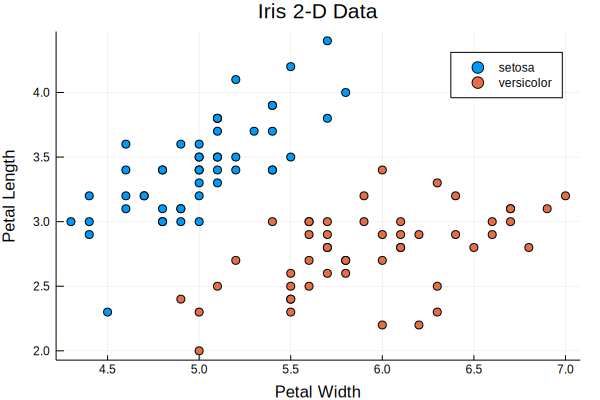

In [91]:
scatter([x[1:2] for x in data1 if x[3] == "setosa"], label = "setosa")
scatter!([x[1:2] for x in data1 if x[3] != "setosa"], label = "versicolor")
plot!(title = "Iris 2-D Data", xlabel = "Petal Width", ylabel = "Petal Length")

Hypothesis, Learning Algorith and Predictor Functions.
(ref: https://serhanaya.github.io/neural-networks-julia-implementation/)

In [101]:
wt = rand(3)                       
function h(wt, x)
    x_new = [1.0, x[1], x[2]]
    return wt'x_new > 0 ? 1 : -1
end

function PLA(wt, x, y)
    if h(wt, x) != y
        wt += y*[1.0, x[1], x[2]]
    end
    return w
end

function predictor(n, wt, test)
    return h(wt, test[n]) == 1 ? "setosa" : "versicolor"
end

predictor (generic function with 1 method)

Takes in a data set and number of iterations. It will split the data into training and testing, train the data and make predictions. The output will be the percentage of correct predictions of your testing set.

In [104]:
function final_predict(data, iter)
    wt = rand(3)
    
    shuffled = data = data[shuffle(1:end), :]
    train = shuffled[1:80,:]
    test = shuffled[81:100,:]
    X, Y = [[x[1], x[2]] for x in train], [x[3] == "setosa" ? 1 : -1 for x in train]   
    for i = 1:100
        j = rand(1:80)
        wt = PLA(wt, X[j], Y[j])
    end
    
    accuracy_count = []
    for i = 1:iter
        n = rand(1:20)
        if predictor(n, wt, test) == test[n][3]
            push!(accuracy_count, 1)
        end
    end
    accuracy = sum(accuracy_count) / iter * 100
    return accuracy, wt
end

final_predict (generic function with 1 method)

PREDICTION. Run each possible combination, evalute the accuracy, remember there are six of them:

Combination 1

In [105]:
predict , wt = final_predict(SepalLength_SepalWidth, 1000)
if predict > 90.0    
    print("Comparing Sepal Length vs Sepal Width, the prediction is ", predict, "%")
    else print("Comparing Sepal Length vs Sepal Width, the prediction is NOT good enough")
end

Comparing Sepal Length vs Sepal Width, the prediction is NOT good enough

Combination 2

In [95]:
predict , wt = predict(SepalLength_PetalLength, 1000)
if predict > 90.0    
    print("Comparing Sepal Length vs Petal Length, the prediction is ", predict, "%")
    else print("Comparing Sepal Length vs Petal Length, the prediction is NOT good enough")
end

Comparing Sepal Length vs Petal Length, the prediction is NOT good enough

Combination 3

In [96]:
predict , wt = predict(SepalLength_PetalWidth, 1000)
if predict > 90.0    
    print("Comparing Sepal Length vs Petal Width, the prediction is ", predict, "%")
    else print("Comparing Sepal Length vs Petal Width, the prediction is NOT good enough")
end

Comparing Sepal Length vs Petal Width, the prediction is NOT good enough

Combination 4

In [97]:
predict , wt = predict(SepalWidth_PetalLength, 1000)
if predict > 90.0    
    print("Comparing Sepal Width vs Petal Length, the prediction is ", predict, "%")
    else print("Comparing Sepal Width vs Petal Length, the prediction is NOT good enough")
end

Comparing Sepal Width vs Petal Length, the prediction is NOT good enough

Combination 5

In [98]:
predict , wt = predict(SepalWidth_PetalWidth, 1000)
if predict > 90.0    
    print("Comparing Sepal Width vs Petal Width, the prediction is ", predict, "%")
    else print("Comparing Sepal Width vs Petal Width, the prediction is NOT good enough")
end

Comparing Sepal Width vs Petal Width, the prediction is NOT good enough

Combination 6

In [99]:
predict , wt = predict(PetalLength_PetalWidth, 1000)
if predict > 90.0    
    print("Comparing Petal Length vs Petal Width, the prediction is ", predict, "%")
    else print("Comparing Petal Length vs Petal Width, the prediction is NOT good enough")
end

Comparing Petal Length vs Petal Width, the prediction is 100.0%

The hypothesis conclusion is that PetalLenght vs PetalWidth gives the best linearly separated data as shown in the plot below:

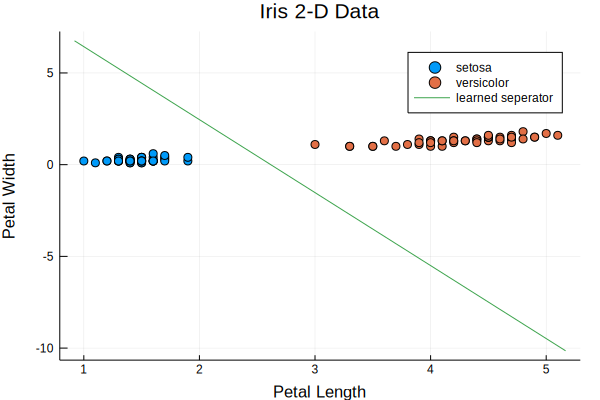

In [107]:
scatter([x[1:2] for x in PetalLength_PetalWidth if x[3] == "setosa"], label = "setosa")
scatter!([x[1:2] for x in PetalLength_PetalWidth if x[3] != "setosa"], label = "versicolor")
plot!(title = "Iris 2-D Data", xlabel = "Petal Length", ylabel = "Petal Width")
plot!(x -> (-wt[1]-wt[2]*x)/wt[3], label= "learned seperator")